## IMPORT LIBRARY

- **pandas (`pd`):**  
  Untuk memanipulasi data tabular (DataFrame).
- **numpy (`np`):**  
  Operasi numerik dan array multidimensi.
- **scikit-learn:**
  - `train_test_split`: Membagi data menjadi data latih dan uji.
  - `MultiLabelBinarizer`, `LabelEncoder`: Encoding label (multi-label dan single-label).
  - `TfidfVectorizer`: Mengubah teks menjadi fitur numerik (TF-IDF).
  - `MinMaxScaler`: Normalisasi fitur ke rentang [0, 1].
  - `cosine_similarity`: Menghitung kemiripan antar vektor.
  - `TSNE`: Reduksi dimensi data untuk visualisasi.
- **tensorflow.keras:**
  - `Sequential`, `Model`, `Dense`, `Input`: Membangun dan melatih neural network.
- **ast:**  
  Parsing string ke struktur data Python (misal: string ke list/dict).
- **seaborn (`sns`), matplotlib (`plt`):**  
  Visualisasi data dan hasil analisis/model.
- **tensorflow (`tf`):**  
  Framework utama machine learning/deep learning.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Input
import ast
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Data Load

- Mengecek struktur dan sample data sebelum dilakukan analisis atau pemrosesan lebih lanjut.

In [2]:
df = pd.read_csv('/content/goodreads_data.csv')
df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


Mengecek Panjang / Jumlah Data

In [3]:
jumlah_data = len(df)
print(jumlah_data)

10000


Mendeskripsikan Dataset

In [4]:
df.describe()

,Unnamed: 0,Avg_Rating
count,10000.00000,10000.000000
mean,4999.50000,4.068577
std,2886.89568,0.335359
min,0.00000,0.000000
25%,2499.75000,3.880000
50%,4999.50000,4.080000
75%,7499.25000,4.260000
max,9999.00000,5.000000


Info pada dataset seperti kolom, dan lain lain

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   10000 non-null  int64  
 1   Book         10000 non-null  object 
 2   Author       10000 non-null  object 
 3   Description  9923 non-null   object 
 4   Genres       10000 non-null  object 
 5   Avg_Rating   10000 non-null  float64
 6   Num_Ratings  10000 non-null  object 
 7   URL          10000 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 625.1+ KB


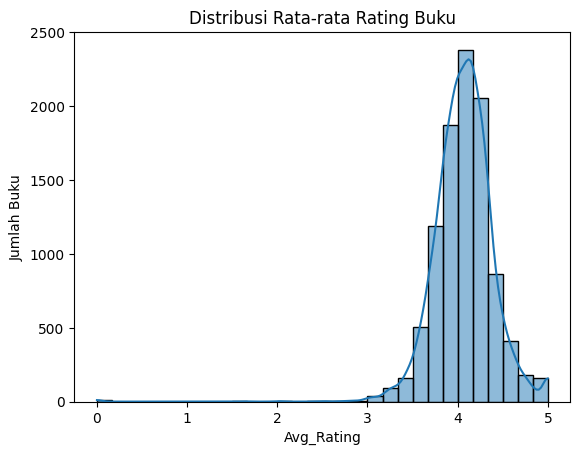

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['Avg_Rating'], bins=30, kde=True)
plt.title("Distribusi Rata-rata Rating Buku")
plt.xlabel("Avg_Rating")
plt.ylabel("Jumlah Buku")
plt.show()

## PREPROCESSING

Menghitung jumlah data yang duplikasi

In [6]:
df.duplicated().sum()

np.int64(0)

Menghitung jumlah data yang mengandung nilai null

In [7]:
df.isnull().sum()
df = df.dropna()

Kode berikut digunakan untuk menghapus kolom 'Unnamed: 0' dan 'URL' dari DataFrame jika kolom tersebut ada. Pertama, kode akan memeriksa apakah kedua nama kolom tersebut terdapat pada data. Jika salah satunya atau keduanya ditemukan, kolom tersebut akan dihapus dari DataFrame menggunakan fungsi `drop`. Langkah ini bertujuan untuk membersihkan data dari kolom-kolom yang tidak diperlukan, sehingga proses analisis selanjutnya menjadi lebih efisien dan hasil yang diperoleh tidak terpengaruh oleh kolom yang tidak relevan.

In [8]:
#  Hapus kolom 'Unnamed: 0' dan 'URL' jika ada
columns_to_drop = [col for col in ['Unnamed: 0', 'URL'] if col in df.columns]
df.drop(columns=columns_to_drop, inplace=True)

<ipython-input-8-251cada93da3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=columns_to_drop, inplace=True)


Kode ini digunakan untuk mengonversi kolom 'Num_Ratings' dari format string (yang mungkin memiliki tanda koma sebagai pemisah ribuan) menjadi tipe data integer.  
Pertama, fungsi `.str.replace(',', '')` menghapus semua koma dari nilai pada kolom tersebut, lalu `.astype(int)` mengubah hasilnya menjadi bilangan bulat (integer).  
Langkah ini penting agar data pada kolom 'Num_Ratings' dapat digunakan untuk analisis numerik tanpa error.  
Setelah proses konversi, tipe data setiap kolom dan lima baris pertama data ditampilkan untuk memastikan hasil perubahan sudah sesuai.

In [9]:
#  Konversi 'Num_Ratings' dari string ke integer (hilangkan koma)
df['Num_Ratings'] = df['Num_Ratings'].str.replace(',', '').astype(int)

# Lihat hasilnya
print(df.dtypes)
print(df.head())

Book            object
Author          object
Description     object
Genres          object
Avg_Rating     float64
Num_Ratings      int64
dtype: object
                                                Book         Author  \
0                              To Kill a Mockingbird     Harper Lee   
1  Harry Potter and the Philosopher’s Stone (Harr...   J.K. Rowling   
2                                Pride and Prejudice    Jane Austen   
3                          The Diary of a Young Girl     Anne Frank   
4                                        Animal Farm  George Orwell   

                                         Description  \
0  The unforgettable novel of a childhood in a sl...   
1  Harry Potter thinks he is an ordinary boy - un...   
2  Since its immediate success in 1813, Pride and...   
3  Discovered in the attic in which she spent the...   
4  Librarian's note: There is an Alternate Cover ...   

                                              Genres  Avg_Rating  Num_Ratings  
0  [

<ipython-input-9-5f5f1e90762a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_Ratings'] = df['Num_Ratings'].str.replace(',', '').astype(int)


In [10]:
df.head()

,Book,Author,Description,Genres,Avg_Rating,Num_Ratings
0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,5691311
1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135
2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,3944155
3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,3488438
4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,3575172


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9923 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Book         9923 non-null   object 
 1   Author       9923 non-null   object 
 2   Description  9923 non-null   object 
 3   Genres       9923 non-null   object 
 4   Avg_Rating   9923 non-null   float64
 5   Num_Ratings  9923 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 542.7+ KB


Kode ini digunakan untuk mengonversi data pada kolom 'Genres' dari format string (misal: "['Fiction', 'Romance']") menjadi list Python (`['Fiction', 'Romance']`).  
Fungsi `ast.literal_eval` secara otomatis mengubah string yang berisi representasi list menjadi objek list.  
Langkah ini penting agar data 'Genres' dapat digunakan untuk analisis lebih lanjut, seperti encoding multi-label atau pemrosesan fitur berbasis list.

In [12]:
# Pastikan 'Genres' diubah dari string ke list Python
df['Genres'] = df['Genres'].apply(lambda x: ast.literal_eval(x))

Kode ini digunakan untuk mengubah data pada kolom 'Genres' (berisi list beberapa genre per buku) menjadi fitur numerik (multi-label one-hot encoding).

- `MultiLabelBinarizer()` membuat objek encoder multi-label.
- `mlb.fit_transform(df['Genres'])` mengubah setiap list genre menjadi vektor biner (1 jika buku memiliki genre tersebut, 0 jika tidak).
- Hasil encoding disimpan dalam DataFrame baru `genres_df` dengan nama kolom sesuai genre.

In [13]:
#  Multi-hot Encoding untuk Genres
df['Genres'] = df['Genres'].apply(lambda x: [genre.strip() for genre in x] if isinstance(x, list) else [])
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df['Genres'])
genre_df = pd.DataFrame(genre_encoded, columns=mlb.classes_)

Kode ini bertujuan untuk mengoptimalkan fitur teks melalui teknik representasi TF-IDF dengan menggabungkan informasi dari kolom 'Description' dan 'Genres'. Langkah pertama adalah memastikan bahwa setiap data pada kolom 'Genres' bertipe list diubah menjadi string dengan genre dipisahkan oleh spasi. Selanjutnya, kolom baru 'Description_Genres' dibentuk melalui penggabungan teks deskripsi dan genre, sehingga data teks menjadi lebih kaya dan informatif. Seluruh teks gabungan ini kemudian diubah menjadi vektor numerik menggunakan `TfidfVectorizer` dengan maksimal 300 fitur dan penghapusan kata-kata umum (stop words) bahasa Inggris. Hasil proses ini disimpan pada sebuah DataFrame baru yang merepresentasikan setiap buku dalam bentuk fitur numerik yang siap digunakan untuk proses analisis atau pemodelan machine learning.

In [14]:
# Jika Genres bertipe list, ubah jadi string dipisahkan spasi
df['Genres_str'] = df['Genres'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
df['Description_Genres'] = df['Description'].fillna('') + ' ' + df['Genres_str'].fillna('')

tfidf = TfidfVectorizer(max_features=300, stop_words='english')
description_tfidf = tfidf.fit_transform(df['Description_Genres'])
description_df = pd.DataFrame(description_tfidf.toarray(), columns=tfidf.get_feature_names_out())

Kode ini digunakan untuk mengubah data kategorikal pada kolom 'Author' dan 'Book' menjadi representasi numerik menggunakan teknik label encoding. Proses ini dilakukan dengan membuat dua objek `LabelEncoder`, masing-masing untuk kolom 'Author' dan kolom 'Book'. Selanjutnya, setiap nama penulis dan judul buku diubah menjadi angka unik yang disimpan dalam kolom baru 'Author_ID' dan 'Book_ID'. Langkah ini penting agar data yang semula berupa teks kategori dapat digunakan sebagai fitur numerik dalam pemodelan machine learning, sehingga algoritma dapat memprosesnya dengan lebih efisien.

In [15]:
#  Label Encoding untuk Author dan Book
le_author = LabelEncoder()
le_book = LabelEncoder()
df['Author_ID'] = le_author.fit_transform(df['Author'])
df['Book_ID'] = le_book.fit_transform(df['Book'])

igunakan untuk menyatukan berbagai fitur yang telah diproses menjadi satu DataFrame utama bernama final_features yang akan digunakan sebagai input ke model machine learning. Pertama, fitur numerik seperti Avg_Rating_norm dan Num_Ratings_norm (hasil normalisasi dari rating dan jumlah rating buku) disiapkan dari DataFrame asli df. Kemudian, fitur genre yang telah diubah menjadi representasi one-hot encoding disatukan dari genre_df. Terakhir, fitur teks dari deskripsi dan genre buku yang sudah direpresentasikan dalam bentuk vektor TF-IDF ditambahkan dari description_df. Semua bagian ini di-reset index-nya agar sejajar, lalu digabung secara horizontal (axis=1). Hasilnya adalah satu set fitur komprehensif dan konsisten yang siap digunakan dalam pelatihan model.

In [17]:
# Inisialisasi scaler
scaler = MinMaxScaler()
# Lakukan normalisasi
df[['Avg_Rating_norm', 'Num_Ratings_norm']] = scaler.fit_transform(df[['Avg_Rating', 'Num_Ratings']])

In [18]:
final_features = pd.concat([
    df[['Avg_Rating_norm', 'Num_Ratings_norm']].reset_index(drop=True),
    genre_df.reset_index(drop=True),
    description_df.reset_index(drop=True)
], axis=1)


Kode ini digunakan untuk melakukan normalisasi pada kolom 'Avg_Rating' dan 'Num_Ratings' agar nilainya berada dalam rentang 0 hingga 1 menggunakan `MinMaxScaler`. Pertama, objek scaler diinisialisasi, lalu kolom 'Avg_Rating' dan 'Num_Ratings' dinormalisasi dan hasilnya disimpan pada kolom baru 'Avg_Rating_norm' dan 'Num_Ratings_norm'. Normalisasi ini penting agar fitur numerik memiliki skala yang sama sehingga membantu meningkatkan kinerja serta stabilitas algoritma machine learning.

In [19]:
# Tampilkan 5 baris pertama setelah normalisasi
print("\nSetelah normalisasi:")
print(df[['Avg_Rating_norm', 'Num_Ratings_norm']].head())


Setelah normalisasi:
   Avg_Rating_norm  Num_Ratings_norm
0            0.854          0.613411
1            0.894          1.000000
2            0.856          0.425102
3            0.836          0.375985
4            0.796          0.385333


## MODELLING

Kode ini digunakan untuk mengekstrak seluruh nilai fitur dari DataFrame `final_features` menjadi sebuah array NumPy yang akan digunakan sebagai input ke model machine learning. Baris `X = final_features.values` mengonversi DataFrame menjadi array dua dimensi, di mana setiap baris merepresentasikan satu sampel data dan setiap kolom merepresentasikan satu fitur. Dengan perintah `print("Shape input ke model:", X.shape)`, Anda dapat melihat dimensi array tersebut (jumlah baris dan kolom), sehingga dapat memastikan bahwa data yang akan digunakan untuk pelatihan atau prediksi sudah dalam format yang sesuai untuk model machine learning.

In [20]:
X = final_features.values
print("Shape input ke model:", X.shape)

Shape input ke model: (9923, 919)


Kode ini membangun dan mengompilasi sebuah model autoencoder menggunakan Keras. Autoencoder ini digunakan untuk melakukan pembelajaran representasi (encoding) dari data fitur input, yang kemudian dapat digunakan untuk ekstraksi fitur, deteksi anomali, atau reduksi dimensi.

In [21]:
input_layer = Input(shape=(X.shape[1],), name="input_layer")

# Encoder
x = Dense(128, activation='relu')(input_layer)
x = Dense(64, activation='relu')(x)
embedding = Dense(32, activation='relu', name="embedding_output")(x)

# Decoder
x = Dense(64, activation='relu')(embedding)
x = Dense(128, activation='relu')(x)
output_layer = Dense(X.shape[1], activation='linear')(x)  # Output shape sama seperti input

# Bangun model autoencoder
autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 919)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       117,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_output (Dense)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 919)            │       118,551 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 257,079 (1004.21 KB)

 Trainable params: 257,079 (1004.21 KB)

 Non-trainable params: 0 (0.00 B)

Kode ini menjalankan proses pelatihan (training) model autoencoder yang telah dibangun sebelumnya. Dengan perintah `autoencoder.fit(X, X, epochs=20, batch_size=32, validation_split=0.1)`, data input (`X`) digunakan baik sebagai data masukan maupun target, karena autoencoder bertujuan merekonstruksi inputnya sendiri. Proses pelatihan dilakukan selama 20 epoch, dengan ukuran batch 32, dan 10% data digunakan sebagai data validasi untuk memonitor performa model selama training. Langkah ini penting agar model belajar merepresentasikan fitur-fitur utama dari data secara efisien.

In [22]:
autoencoder.fit(X, X, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 0.0064 - val_loss: 0.0029
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0040 - val_loss: 0.0025
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0035 - val_loss: 0.0024
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0029 - val_loss: 0.0022
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0028 - val_loss: 0.0022
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 10/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0026 - val_loss: 0.0021
Epoch 11/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 12/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

## TESTING

Kode ini digunakan untuk menghasilkan representasi vektor embedding dari data buku menggunakan model autoencoder yang telah dilatih. Dengan menjalankan `book_embeddings = autoencoder.predict(X)`, seluruh data fitur buku diproses melalui model sehingga menghasilkan vektor embedding (representasi baru) untuk setiap buku. Vektor embedding ini dapat digunakan untuk berbagai keperluan seperti pencarian kemiripan antar buku, clustering, atau visualisasi. Contoh keluaran vektor embedding untuk buku pertama ditampilkan dengan `print("Vektor embedding buku ke-0:\n", book_embeddings[0])` agar Anda dapat melihat bentuk representasi numerik hasil transformasi autoencoder.

In [23]:
book_embeddings = autoencoder.predict(X)
# Contoh: Lihat vektor embedding buku pertama
print("Vektor embedding buku ke-0:\n", book_embeddings[0])

311/311 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Vektor embedding buku ke-0:
 [ 8.14184427e-01  4.91573587e-02 -3.65537126e-04  2.93959118e-03
  3.61246429e-03  1.51038915e-02  1.81794353e-02 -2.25941017e-02
 -6.95089996e-02 -8.57887138e-03 -6.68742321e-03 -1.77205075e-04
  5.32410946e-03 -5.42177297e-02  1.57112221e-03 -1.23830931e-03
  4.15701390e-04 -3.83069217e-02  1.45322472e-01 -9.95891616e-02
  3.98518145e-03  4.43884842e-02 -2.50073941e-03  8.64271075e-04
 -3.54861957e-04  2.19736458e-03 -6.19689003e-04 -9.16822907e-03
  5.13751991e-04  4.40613367e-04  4.72343899e-03  4.83052395e-02
 -3.15408269e-03 -1.12565383e-02 -4.46918514e-03  1.16505893e-03
 -5.96136670e-04  2.41502188e-03  2.08728481e-03  1.71309337e-02
  1.58636067e-02 -6.06266782e-04 -1.05866417e-03  2.38697976e-03
  1.57991424e-03  5.28381113e-03  5.83854038e-03  3.57881933e-03
  1.75829988e-03  1.51240379e-02  2.44939290e-02  3.81153263e-03
  5.82302362e-03  2.73287185e-02 -1.00861699e-03 -1.42349792e-03
  5.42413257e-02  6.

Kode ini digunakan untuk menghitung kemiripan antar semua buku berdasarkan vektor embedding yang dihasilkan autoencoder, menggunakan metode cosine similarity. Langkah-langkah utama:

1. `similarity_matrix = cosine_similarity(book_embeddings)`  
   Menghitung matriks kemiripan antar semua buku, di mana setiap nilai merepresentasikan tingkat kemiripan antara dua buku (nilai 1 berarti identik, semakin mendekati 0 semakin tidak mirip).

2. `book_idx = 2`  
   Menentukan indeks buku yang akan dijadikan referensi untuk pencarian buku-buku serupa.

3. Mengambil 5 buku paling mirip (selain dirinya sendiri)  
   - Kemiripan semua buku terhadap referensi diurutkan dari paling mirip ke paling tidak mirip.
   - Indeks pertama (nilai tertinggi) di-skip karena itu adalah dirinya sendiri.
   - Lima buku berikutnya diambil sebagai rekomendasi teratas.

4. Menampilkan hasil  
   - Menampilkan judul dan genre buku referensi.
   - Menampilkan judul, genre, dan skor kemiripan (akurasi kemiripan) dari 5 buku paling mirip.

Kode ini sangat berguna untuk membuat sistem rekomendasi buku berbasis kemiripan fitur, sehingga pengguna bisa diberi saran buku-buku yang relevan berdasarkan satu buku referensi.

In [24]:
# Hitung cosine similarity antar semua buku
similarity_matrix = cosine_similarity(book_embeddings)

# Pilih indeks buku sebagai referensi
book_idx = 2

# Cari top 5 buku mirip (selain dirinya sendiri)
similar_scores = list(enumerate(similarity_matrix[book_idx]))
similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)[1:6]  # Skip dirinya sendiri

print(f"Top 5 buku mirip dengan buku ke-{book_idx}:")
print(f"Judul Referensi: {df.iloc[book_idx]['Book']}")
print(f"Genre Referensi: {df.iloc[book_idx]['Genres']}\n")

for idx, score in similar_scores:
    title = df.iloc[idx]['Book']
    genres = df.iloc[idx]['Genres']
    print(f"- Judul: {title}")
    print(f"  Genre: {genres}")
    print(f"  Akurasi Kemiripan: {score:.4f}\n")

Top 5 buku mirip dengan buku ke-2:
Judul Referensi: Pride and Prejudice
Genre Referensi: ['Classics', 'Fiction', 'Romance', 'Historical Fiction', 'Literature', 'Historical', 'Audiobook']

- Judul: Emma
  Genre: ['Classics', 'Fiction', 'Romance', 'Historical Fiction', 'Literature', 'Historical', 'Audiobook']
  Akurasi Kemiripan: 0.9995

- Judul: Sense and Sensibility
  Genre: ['Classics', 'Fiction', 'Romance', 'Historical Fiction', 'Literature', 'Historical', 'Audiobook']
  Akurasi Kemiripan: 0.9987

- Judul: Persuasion
  Genre: ['Classics', 'Fiction', 'Romance', 'Historical Fiction', 'Literature', 'Historical', 'Audiobook']
  Akurasi Kemiripan: 0.9986

- Judul: The Complete Novels
  Genre: ['Classics', 'Fiction', 'Romance', 'Historical Fiction', 'Literature', 'Historical', 'Classic Literature']
  Akurasi Kemiripan: 0.9242

- Judul: Jane Eyre
  Genre: ['Classics', 'Fiction', 'Romance', 'Historical Fiction', 'Gothic', 'Literature', 'Historical']
  Akurasi Kemiripan: 0.9190



## VISUALISASI

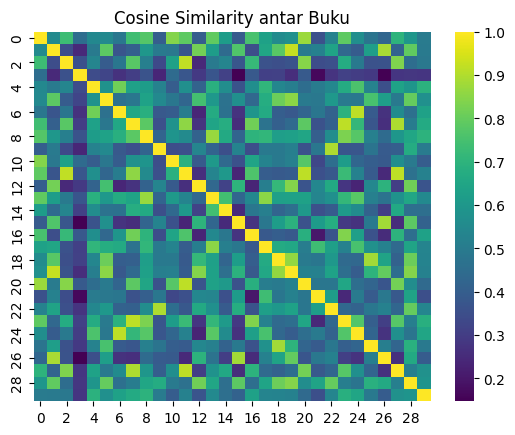

In [25]:
sns.heatmap(similarity_matrix[:30, :30], cmap='viridis')  # subset 30 buku agar tidak terlalu besar
plt.title("Cosine Similarity antar Buku")
plt.show()

menunjukkan visualisasi matriks Cosine Similarity antar buku. Setiap titik pada matriks ini merepresentasikan tingkat kemiripan antara dua buku berdasarkan fitur-fitur yang telah diekstrak dan diolah menggunakan metode embedding. Nilai cosine similarity berkisar antara 0 hingga 1, di mana nilai 1 (warna kuning terang pada diagonal) menandakan buku yang dibandingkan dengan dirinya sendiri, sedangkan nilai mendekati 0 (warna ungu tua) menunjukkan dua buku yang sangat tidak mirip. Pola warna pada matriks ini memberikan gambaran umum tentang seberapa beragam atau homogen koleksi buku yang dianalisis, serta seberapa efektif fitur yang digunakan dalam membedakan satu buku dengan lainnya.

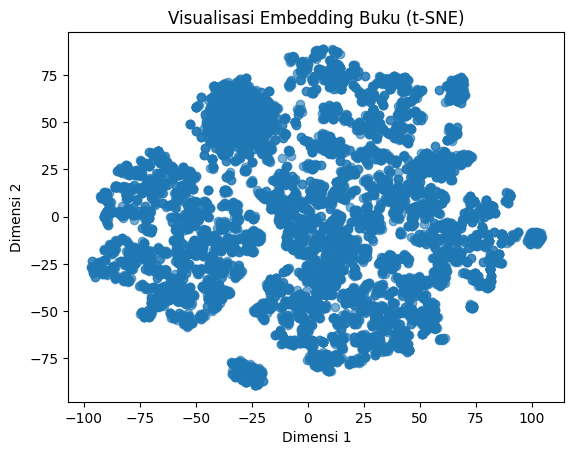

In [26]:
tsne = TSNE(n_components=2, random_state=42)
embed_2d = tsne.fit_transform(book_embeddings)

plt.scatter(embed_2d[:, 0], embed_2d[:, 1], alpha=0.6)
plt.title("Visualisasi Embedding Buku (t-SNE)")
plt.xlabel("Dimensi 1")
plt.ylabel("Dimensi 2")
plt.show()

memperlihatkan visualisasi sebaran embedding buku pada ruang dua dimensi menggunakan teknik t-SNE (t-Distributed Stochastic Neighbor Embedding). Setiap titik pada plot ini merepresentasikan satu buku, di mana posisi titik-titik tersebut menggambarkan kemiripan fitur antara buku berdasarkan hasil ekstraksi embedding dari model autoencoder. Titik-titik yang berdekatan satu sama lain menunjukkan buku-buku yang memiliki kemiripan karakteristik, baik dari segi genre, rating, deskripsi, maupun fitur lain yang digunakan dalam model. Melalui visualisasi ini, kita dapat melihat pola kelompok (cluster) atau persebaran buku secara keseluruhan, yang sangat membantu dalam analisis hubungan atau kemiripan antar buku di dalam dataset.

## EVALUATION

In [27]:
def get_genre_list(genre_val):
    if isinstance(genre_val, list):
        return set(genre_val)
    elif isinstance(genre_val, str):
        genre_val = genre_val.strip("[]")
        genres = [g.strip(" '\"") for g in genre_val.split(",") if g.strip()]
        return set(genres)
    else:
        return set()

def precision_recall_at_k(rekomendasi_idx, ground_truth_genres, df, k=5):
    recommended_genres = set()
    for idx in rekomendasi_idx[:k]:
        genres = get_genre_list(df.iloc[idx]['Genres'])
        recommended_genres.update(genres)
    true_positives = len(recommended_genres & ground_truth_genres)
    precision = true_positives / (len(recommended_genres) + 1e-10)
    recall = true_positives / (len(ground_truth_genres) + 1e-10)
    return precision, recall

def evaluate_model(df, tfidf_matrix, book_index, top_k=5):
    cosine_sim = cosine_similarity(tfidf_matrix[book_index], tfidf_matrix).flatten()
    similar_indices = cosine_sim.argsort()[::-1]
    similar_indices = [i for i in similar_indices if i != book_index]
    rekomendasi_idx = similar_indices[:top_k]
    ground_truth_genres = get_genre_list(df.iloc[book_index]['Genres'])
    precision, recall = precision_recall_at_k(rekomendasi_idx, ground_truth_genres, df, k=top_k)
    print(f"Precision@{top_k}: {precision:.2f}")
    print(f"Recall@{top_k}: {recall:.2f}")
    print("\nRekomendasi untuk buku:", df.iloc[book_index]['Book'])
    for idx in rekomendasi_idx:
        print("-", df.iloc[idx]['Book'])

In [28]:
evaluate_model(df, description_tfidf, book_index=2, top_k=5)

Precision@5: 0.64
Recall@5: 1.00

Rekomendasi untuk buku: Pride and Prejudice
- Emma
- عصر الحب
- Egipcjanin Sinuhe, tom 1
- ثلاثية غرناطة
- I, Claudius (Claudius, #1)
